Código Extrado do "Projeto para Cálculo de métricas de avaliação" do curso DIO de Machine Leraning

In [7]:
!pip install -q tensorflow-gpu

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd



In [8]:
tf.__version__

'2.17.1'

In [9]:
%load_ext tensorboard

In [11]:
logdir="log"

In [14]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels)
          )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9253 - loss: 0.2427 - val_accuracy: 0.9859 - val_loss: 0.0431
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9884 - loss: 0.0384 - val_accuracy: 0.9881 - val_loss: 0.0355
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.9866 - val_loss: 0.0380
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9944 - loss: 0.0172 - val_accuracy: 0.9886 - val_loss: 0.0369
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9964 - loss: 0.0107 - val_accuracy: 0.9890 - val_loss: 0.0375


In [29]:
y_true=test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1) # y_pred=model.predict_classes(test_images) não pode ser usado, método deprecou

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [30]:
classes=[0,1,2,3,4,5,6,7,8,9]

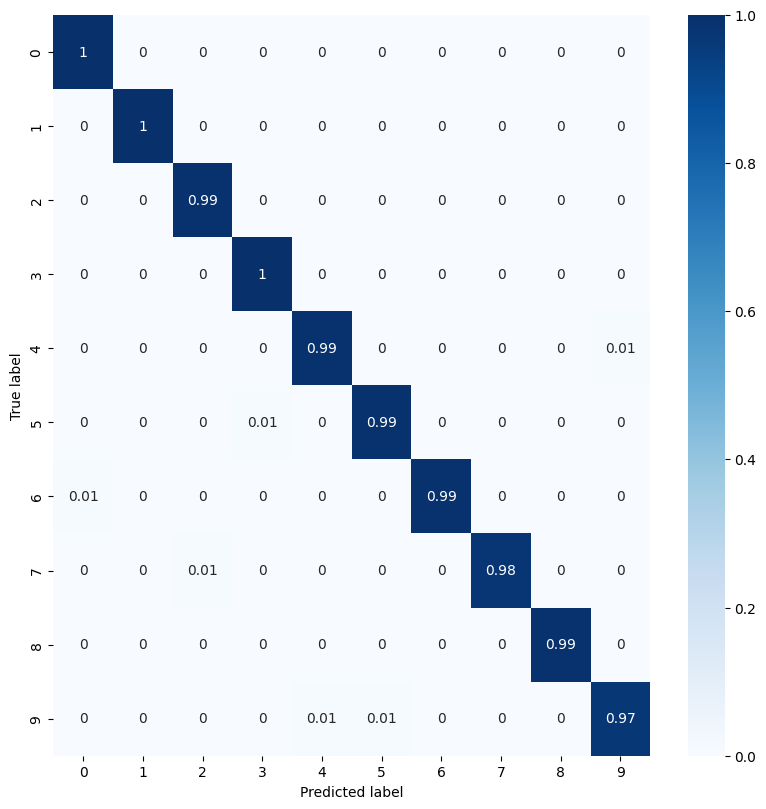

In [31]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
